In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import cv2
import os
import sklearn

In [35]:
for dirname, _, filenames in os.walk('chest_xray\\'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

chest_xray\test\NORMAL\NORMAL-1049278-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1110860-0001.jpeg
chest_xray\test\NORMAL\NORMAL-11419-0001.jpeg
chest_xray\test\NORMAL\NORMAL-115218-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1160949-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1212407-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1228182-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1283091-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1318320-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1368583-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1430636-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1520670-0001.jpeg
chest_xray\test\NORMAL\NORMAL-152130-0001.jpeg
chest_xray\test\NORMAL\NORMAL-159472-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1608079-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1627110-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1698651-0001.jpeg
chest_xray\test\NORMAL\NORMAL-171327-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1759114-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1763721-0001.jpeg
chest_xray\test\NORMAL\NORMAL-1768815-0001.jpe

In [36]:
# Creating dataframe by iterating through filepaths
import pathlib 
pneumonia_dir = pathlib.Path("chest_xray/train/PNEUMONIA/")
normal_dir = pathlib.Path("chest_xray/train/NORMAL/")

In [37]:
dirlist=[pneumonia_dir, normal_dir]
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  5232    labels:  5232


In [39]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(5232,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,chest_xray\train\PNEUMONIA\BACTERIA-1008087-00...,No
1,chest_xray\train\PNEUMONIA\BACTERIA-1025587-00...,No
2,chest_xray\train\PNEUMONIA\BACTERIA-1027194-00...,No
3,chest_xray\train\PNEUMONIA\BACTERIA-1033441-00...,No
4,chest_xray\train\PNEUMONIA\BACTERIA-103798-000...,No


In [40]:
print(df['labels'].value_counts())

No     3883
Yes    1349
Name: labels, dtype: int64


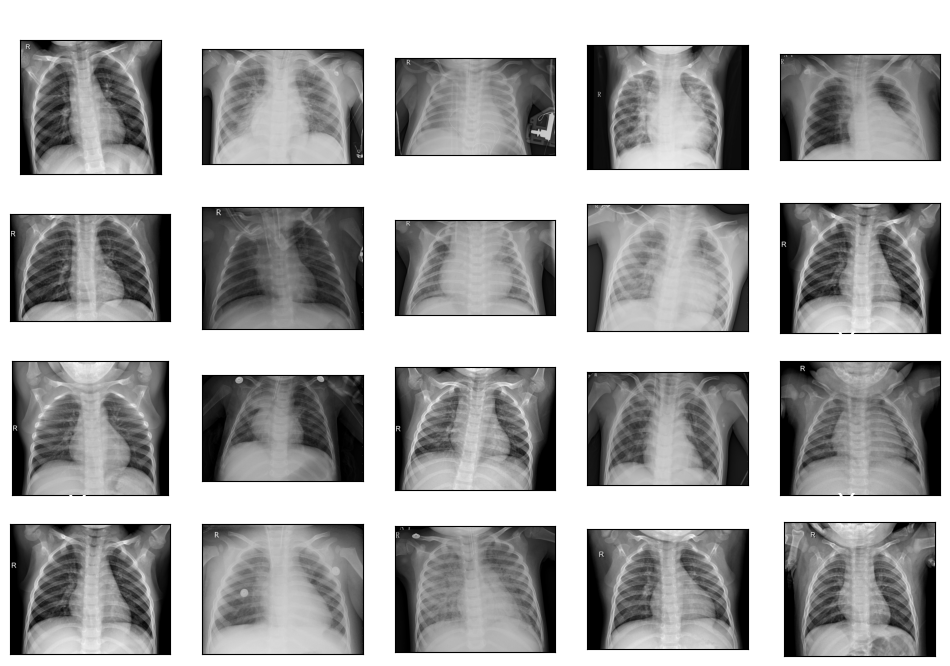

In [41]:
plt.figure(figsize=(12,8))
for i in range(20):
    random = np.random.randint(1,len(df))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "labels"], size = 20, color = "white") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [42]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [43]:
import glob
images_dict = {
    'pnuemonia': list(pneumonia_dir.glob('*')) ,   
    'normal': list(normal_dir.glob('*'))
}

labels_dict = {
    'pnuemonia': "pnuemonia",
    'normal': "normal",
    
}

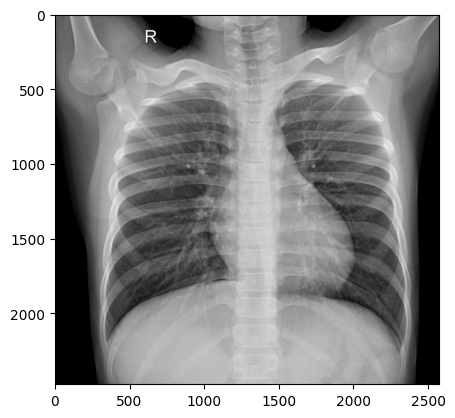

In [44]:
import PIL.Image as Image
from keras.preprocessing.image import ImageDataGenerator
img= cv2.imread(str(images_dict['normal'][0]))
plt.imshow(img)

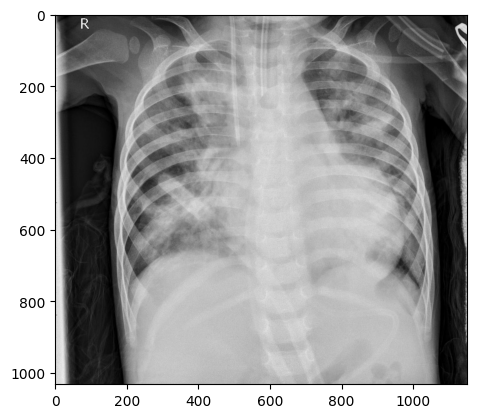

In [45]:
img= cv2.imread(str(images_dict['pnuemonia'][0]))
plt.imshow(img)

In [47]:
X, y = [], []
for name,images in images_dict.items():#returns key , path for each record
    for image in images:
        img=str(image)
        # img=cv2.imread(img)
       
        X.append(img)
        y.append(labels_dict[name])

In [48]:
Fseries = pd.Series(X, name="filepaths",dtype=str)
Lseries = pd.Series(y, name="labels",dtype=str)
pneumonia_data = pd.concat([Fseries,Lseries], axis=1)
pneumonia_df = pd.DataFrame(pneumonia_data)

print(pneumonia_df.head())
print("---------------------")
print(pneumonia_df["labels"].value_counts())

                                           filepaths     labels
0  chest_xray\train\PNEUMONIA\BACTERIA-1008087-00...  pnuemonia
1  chest_xray\train\PNEUMONIA\BACTERIA-1025587-00...  pnuemonia
2  chest_xray\train\PNEUMONIA\BACTERIA-1027194-00...  pnuemonia
3  chest_xray\train\PNEUMONIA\BACTERIA-1033441-00...  pnuemonia
4  chest_xray\train\PNEUMONIA\BACTERIA-103798-000...  pnuemonia
---------------------
pnuemonia    3883
normal       1349
Name: labels, dtype: int64


In [49]:
pneumonia_df.shape

(5232, 2)

In [50]:
#splitting data
from sklearn.model_selection import train_test_split
train_images, test_images = train_test_split(pneumonia_df, test_size=0.3, random_state=42)
# train_set, val_set = train_test_split(pneumonia_df, test_size=0.2, random_state=42)

In [51]:
#shape of splitted data
print(train_images.shape)
print(test_images.shape)
# print(train_set.shape)
# print(val_set.shape)

(3662, 2)
(1570, 2)


In [54]:
#Generate batches of tensor image data with real-time data augmentation.
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_images,x_col="filepaths",y_col="labels",
                                      target_size=(246,246),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(246,246),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
# val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
#                                     target_size=(246,246),
#                                     color_mode= 'rgb',
#                                     class_mode="categorical",
#                                     batch_size=32,
#                                     shuffle=False
#                                    )

Found 3662 validated image filenames belonging to 2 classes.
Found 1570 validated image filenames belonging to 2 classes.


In [55]:
classes=list(train.class_indices.keys())
print (classes)

['normal', 'pnuemonia']


In [56]:
#Defining Sequential Model
from keras.models import Sequential
from keras import layers,losses
cnn= Sequential([
                        #cnn layer 
                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(246,246,3)),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Flatten(),
                        layers.Dense(128, activation='relu'),
                        layers.Dropout(rate=0.3),
                        layers.Dense(64, activation="relu"),
                        layers.Dense(2, activation="sigmoid")

])

In [57]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [58]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 246, 246, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 123, 123, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 119072)            0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [59]:
History = cnn.fit(train, epochs=4)

Epoch 1/4
115/115 [==============================] - 139s 1s/step - loss: 0.2715 - accuracy: 0.9077
Epoch 2/4
115/115 [==============================] - 113s 980ms/step - loss: 0.0864 - accuracy: 0.9672
Epoch 3/4
115/115 [==============================] - 113s 982ms/step - loss: 0.0523 - accuracy: 0.9795
Epoch 4/4
115/115 [==============================] - 113s 982ms/step - loss: 0.0319 - accuracy: 0.9883


In [64]:
test_loss, test_acc = cnn.evaluate(test)

50/50 [==============================] - 19s 367ms/step - loss: 0.1694 - accuracy: 0.9503


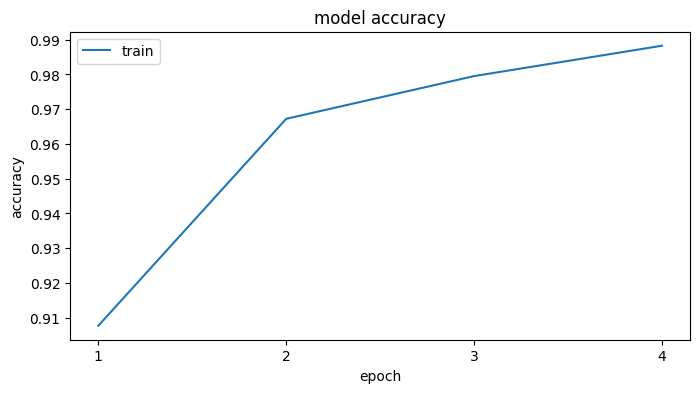

In [103]:
plt.figure(figsize=(8,4))

epochs=[]
for e in History.epoch:
    epochs.append(e+1)

plt.xticks(epochs)
plt.plot(epochs,History.history["accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

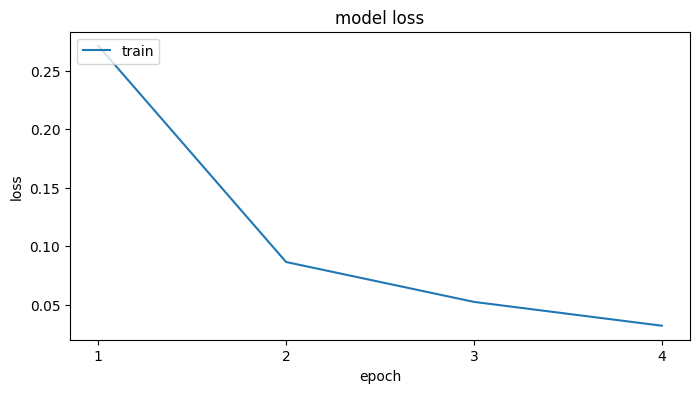

In [104]:
plt.figure(figsize=(8,4))
epochs=[]
for e in History.epoch:
    epochs.append(e+1)

plt.xticks(epochs)
plt.plot(epochs,History.history["loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [105]:
predict_classes = np.argmax(cnn.predict(test), axis=-1)
print(predict_classes)
print(type(predict_classes))

50/50 [==============================] - 20s 390ms/step
[1 1 1 ... 1 1 1]
<class 'numpy.ndarray'>


In [108]:
from sklearn.metrics import confusion_matrix
y_list = test_images['labels'].to_list()
y_test = []
for i in range(len(y_list)):
    if y_list[i] == 'normal':
        y_test.append(0)
    else:
        y_test.append(1)
y_test = np.array(y_test)
cm =  confusion_matrix(y_test, predict_classes)

<Axes: >

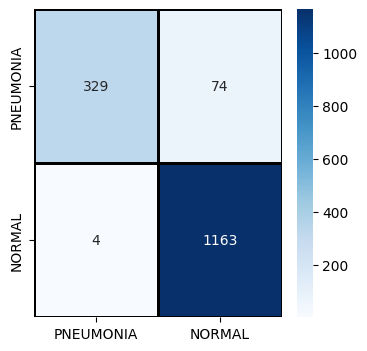

In [109]:
from keras.layers import Dense, Conv2D
plt.figure(figsize = (4,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [110]:
cnn.save("pneumonia_new.h5")

In [30]:
import tensorflow as tf
import numpy as np
from PIL import Image
import glob
import seaborn as sns

In [111]:
@tf.function
def predict_pneumonia(model, data):
    return model(data)

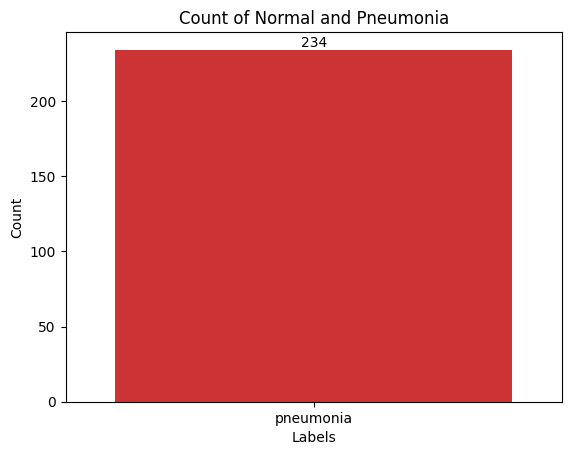

In [112]:
# pneumonia_model = tf.keras.models.load_model("pneumonia.h5")
files = glob.glob("input\*")
predictions = []
for file in files:
    img = Image.open(file).resize((246, 246))
    data = np.array(img) / 255.0
    data = np.repeat(data, 3, axis=-1)
    data = data.reshape((1, 246, 246, 3))
    pred = np.argmax(predict_pneumonia(cnn, data), axis=-1)
    if pred[0] == 0:
        predictions.append("normal")
    else:
        predictions.append("pneumonia")

predictions = np.array(predictions)
unique, counts = np.unique(predictions, return_counts=True)

plot = sns.countplot(x=predictions, palette="Set1")
plot.set(title="Count of Normal and Pneumonia", xlabel="Labels", ylabel="Count")
plot.bar_label(plot.containers[0], label_type='edge', fontsize=10);